In [2]:
#Importing Necesseray Packages ..
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = "whitegrid")

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('data/train_users_2.csv')

In [4]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Assessing Data ..

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

> it's notticable that there are some missing data we need to work around.

> date_account_created, timestamp_first_active, and date_first_booking columns need to be converted to datetime object.

In [6]:
df.gender.unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [7]:
df.signup_method.unique()

array(['facebook', 'basic', 'google'], dtype=object)

In [8]:
df.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [9]:
df.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

> The numbers don't make sense since the max number is not possible.

In [10]:
df.query('age > 1900')

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
388,v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,untracked,Web,Windows Desktop,Firefox,FR
673,umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
1040,m82epwn7i8,2010-07-14,20100714230556,2010-07-15,MALE,2014.0,facebook,0,en,other,craigslist,untracked,Web,Mac Desktop,Chrome,US
1177,2th813zdx7,2010-07-25,20100725234419,2010-07-26,MALE,2013.0,facebook,3,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
1200,3amf04n3o3,2010-07-27,20100727190447,2010-07-29,FEMALE,2014.0,basic,2,en,direct,direct,untracked,Web,Windows Desktop,IE,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197386,99y83scsje,2014-05-31,20140531031949,2014-05-31,FEMALE,1938.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,IE,US
198888,io7z9esqaj,2014-06-03,20140603074958,2014-10-09,MALE,1924.0,facebook,23,en,direct,direct,untracked,Android,Other/Unknown,-unknown-,US
206249,zmlbfc7cso,2014-06-17,20140617230607,2014-06-20,FEMALE,1947.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,US
208819,0dn4tfj6gw,2014-06-22,20140622214130,NaN,FEMALE,1949.0,basic,0,en,direct,direct,untracked,Moweb,Android Phone,Chrome Mobile,NDF


> It seems that alot of users misused the age with birth year ..

# Cleaning Data ..

In [11]:
# Converting columns to datetime ..
df["date_account_created"] = pd.to_datetime(df["date_account_created"])
df["timestamp_first_active"] = pd.to_datetime(df["timestamp_first_active"])
df["date_first_booking"] = pd.to_datetime(df["date_first_booking"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [12]:
# Calculating the right age from the entered birth year ...
df["age"] = df["age"].apply(lambda x : 2021-x  if x>1900 else x)

# Here we are dropping data which doesn't make sense (outliers)
# excluding data from users older than 99 or younger than 18
df = df.query("(age > 17) and (age < 100)")

In [13]:
# Making sure every thing is okay..
df.age.describe()

count    122961.000000
mean         36.573255
std          11.668936
min          18.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          99.000000
Name: age, dtype: float64

# Exploratory Data Analysis

### Q1: Describe the rate of new users signing up on the website.

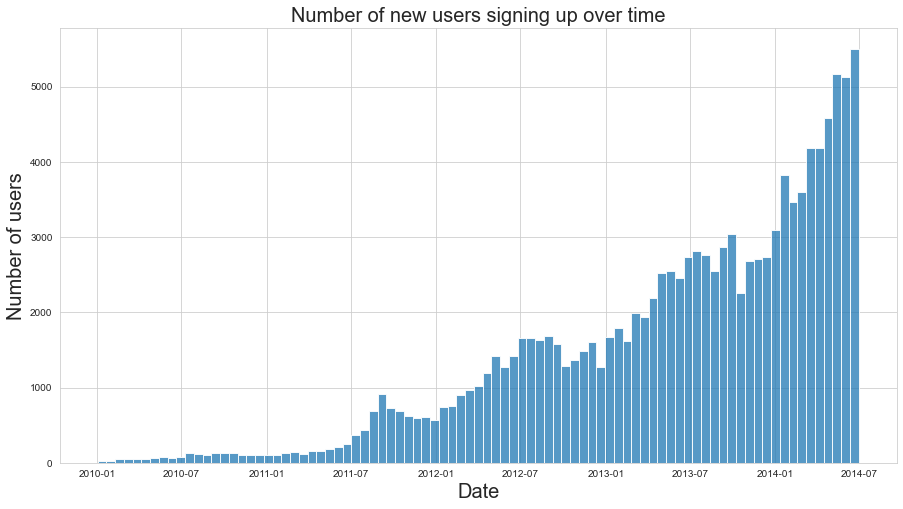

In [14]:
plt.figure(figsize = (15,8))
sns.histplot(data=df,x="date_account_created")
plt.title("Number of new users signing up over time",fontdict = {'fontsize':20})
plt.xlabel("Date",fontdict = {'fontsize':20})
plt.ylabel("Number of users",fontdict = {'fontsize':20});

> As you can see from the line chart above .. the mean number of users, signing up every day, is increasing along with the standard deviation

### Q2: Describe gender distribution of users

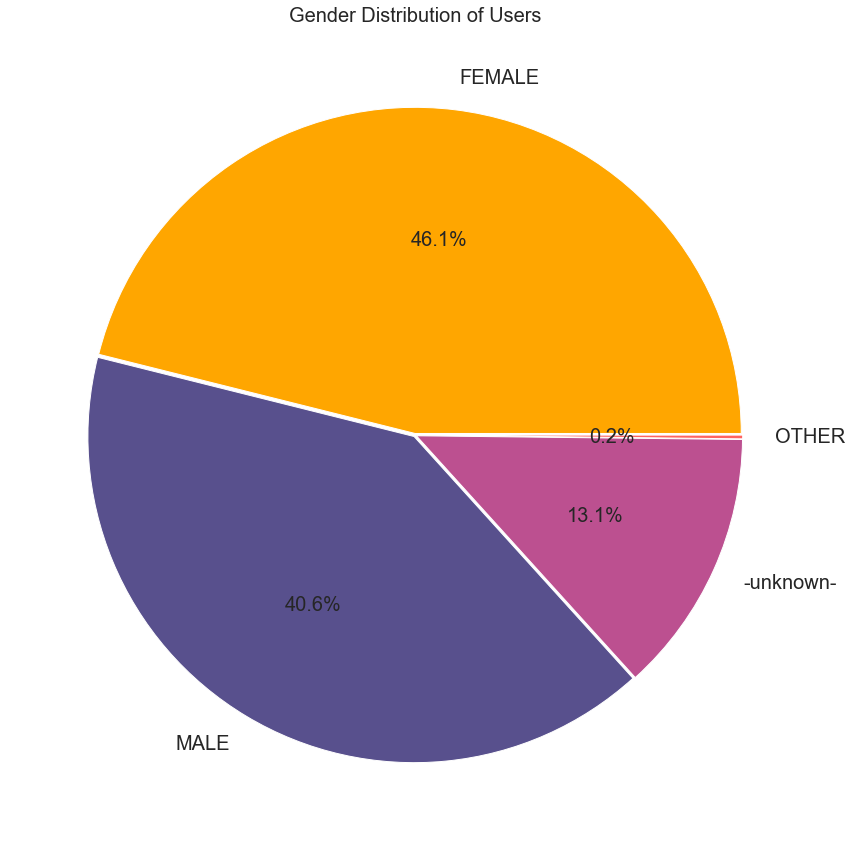

In [15]:
plt.figure(figsize=(15,15))
colors = ['#FFA600','#58508D','#BC5090','#FF6361']
#df.gender.value_counts().plot(kind = 'pie',autopct='%1.1f%%',colors=colors)
plt.pie(df.gender.value_counts(), explode = [0.005,0.005,0.005,0.005],colors=colors,autopct='%1.1f%%',labels = df.gender.value_counts().index,textprops={'fontsize':20})
plt.title("Gender Distribution of Users",{'fontsize':20});

> There are more female users on the website than male users by almost 6%
also, 13.1% rather not specify their gender and 0.2% non binary gender

### Q3: Do users prefer to use their social media account to sign up?

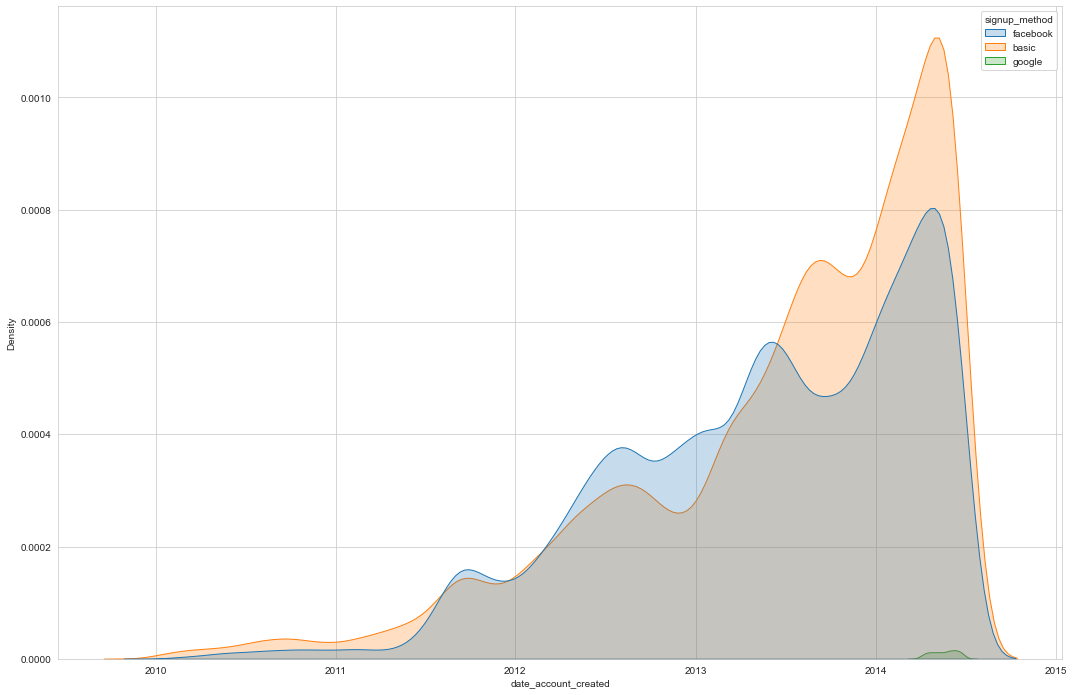

In [16]:
plt.figure(figsize=(18,12))
sns.kdeplot(data=df ,x='date_account_created',hue ='signup_method',shade=True );

> The pie chart describes the over-all preference of the users and the line chart describe how that preference vary overtime. We can see that users are starting to use google on the second quarter of 2014.users prefernce fluctuates between facebook and basic signup process over time.

### Q4: What is age distribution between users ?

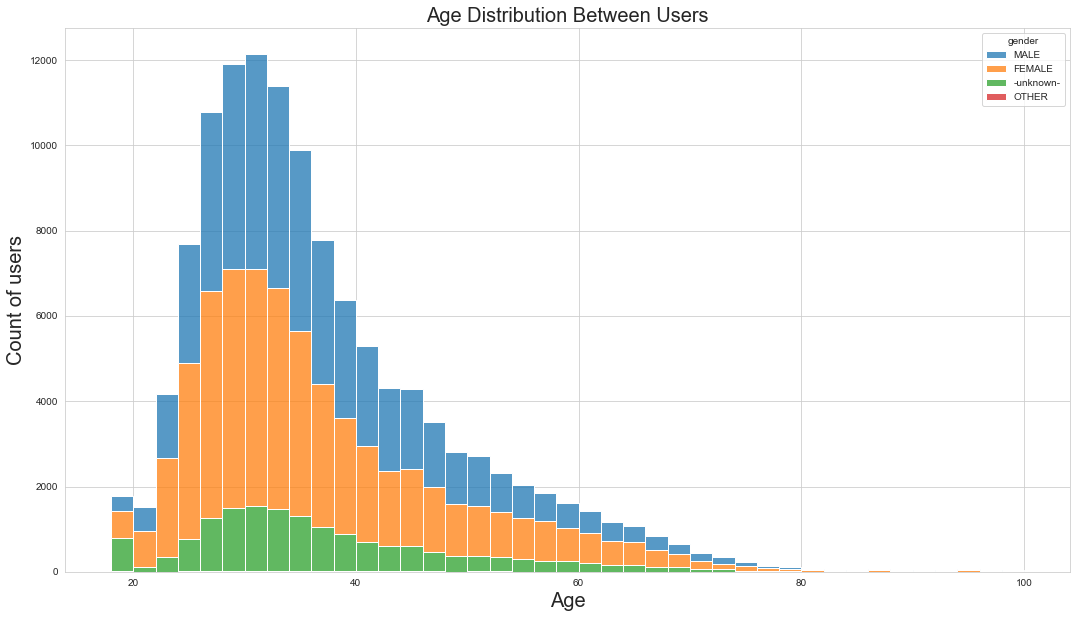

In [17]:
plt.figure(figsize=(18,10))
sns.histplot(data = df,x='age', hue='gender',multiple="stack",binwidth=2)
plt.title("Age Distribution Between Users",{'fontsize':20})
plt.xlabel('Age',{'fontsize':20})
plt.ylabel('Count of users',{'fontsize':20});

> Age distribution seems to be skewed to the right as old people tend to travel less. Users from 25 to 35 have the largest segment as they are in their prime time, they have what it takes to travel more. 

### Q5: Do users prefer to book on a certain week day?

In [82]:
plt.figure(figsize=(15,10))
labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
df.date_first_booking.dt.weekday.value_counts().sort_index()
#sns.barplot(data=df.date_first_booking.dt.weekday.value_counts().sort_index())
#df.date_first_booking.dt.weekday.value_counts().sort_index().plot(kind='bar')

0.0     9638
1.0    10798
2.0    10836
3.0    10500
4.0    10081
5.0     7937
6.0     7406
Name: date_first_booking, dtype: int64

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='date_first_booking', ylabel='Count'>

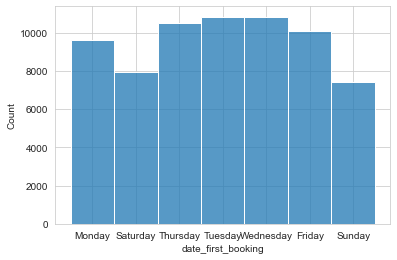

In [67]:
sns.histplot(data=df.date_first_booking.dt.day_name().dropna(),discrete=True)

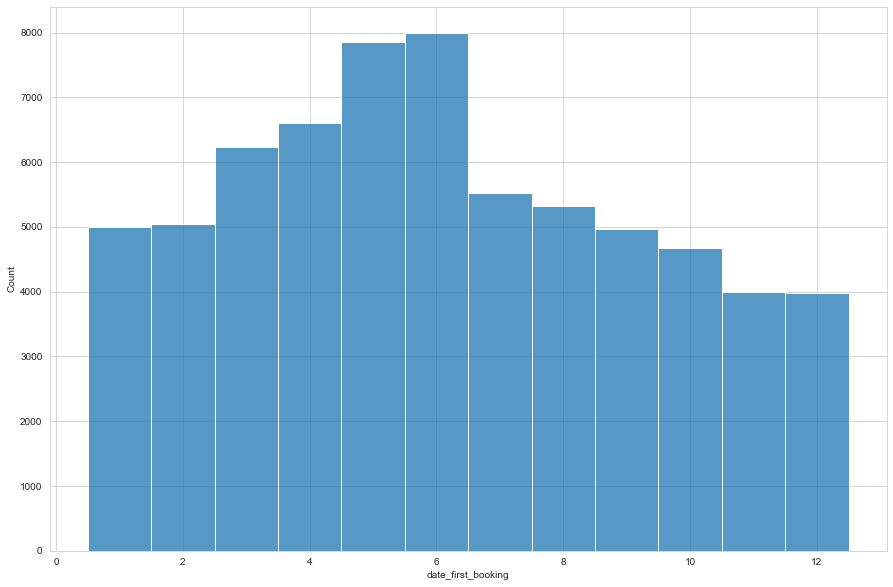

In [65]:
plt.figure(figsize=(15,10))
sns.histplot(data=df.date_first_booking.dt.month.dropna(),discrete=True)
plt.title("");
